## Aspen Snowfall Prediction for Maximizing Ski Powder Days
## DTSA 5509 Final Project


### Project Topic
The purpose of this project is assist skiers to determine which days at Aspen Mountain will have lots of snow. Known as 'Powder Days,' many skiers prefer to ski when there is fresh snow. I have a friend who lives near Aspen, but also has a full-time job. His hours are flexible so he can take some time off to go skiing, but it's not unlimited. He needs to be strategic.

In this project, I implemented SVM and random forest classifiers to create a recommender system for whether the next day will be a powder day or not.

### Data
Per Reference 1, I got the raw data for this project from Colorado State University. CSU has a Colorado Climate Center website, which provides access to data from over 100 weather stations across the state of Colorado. I opted to just use the weather stations closest to the Aspen ski mountain resort.

I pulled 20 years worth of daily data. The columns are Date, Low Temperature, High Temperature, and Precipitation.

This yielded a csv with dimensions of 5 columns x 731 rows.

https://climate.colostate.edu/data_access_new.html

#### CSU Website Screenshot

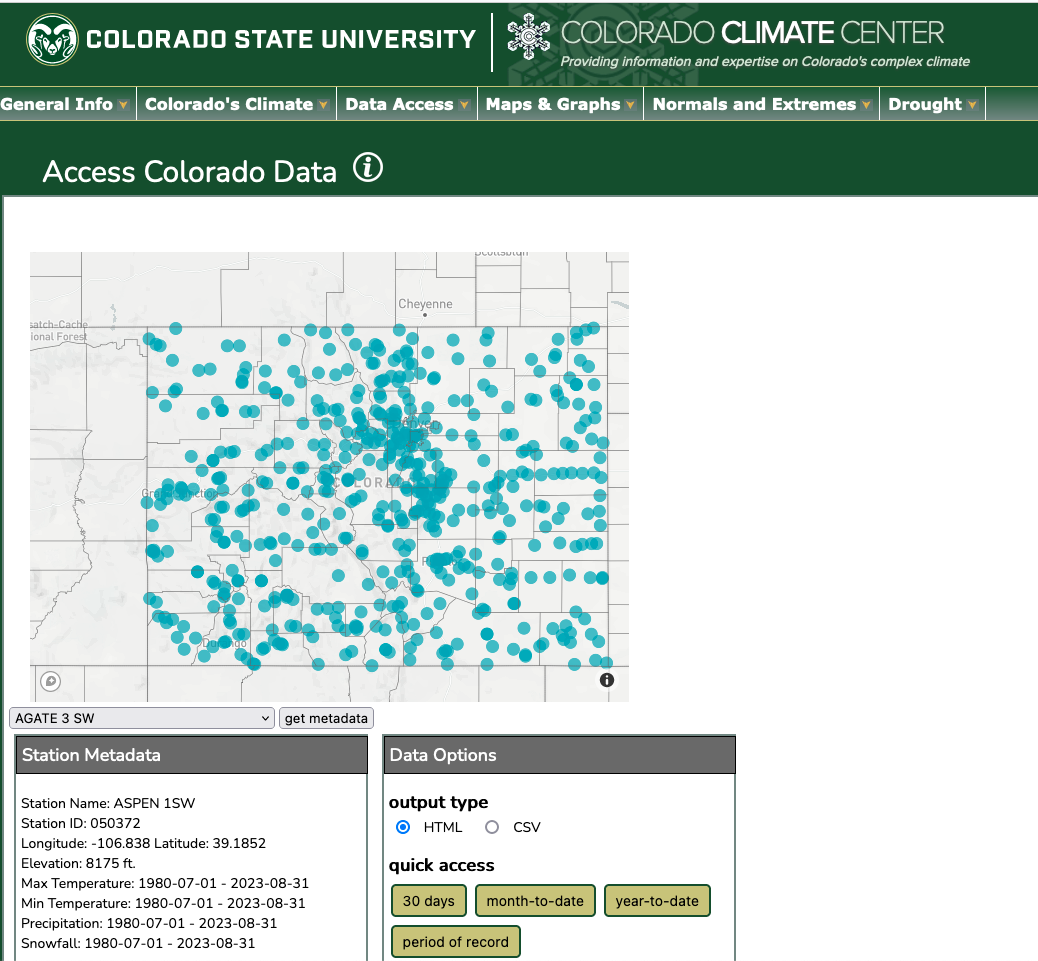

### Data Cleaning
For this particular dataset, cleaning and pre-processing was necessary to reform it into something that could be ingested into supervised machine learning algorithms.

My first step was to remove all data not during the ski season, which I defined as falling only within November to April. I anticipated that if I had July days with no snow conditions, trying to minimize total error might bias the results in an undesirable way.

My third step was to remove all days during which any of the weather stations had incomplete data. Sometimes as fillers for missing data, M or T was recorded in place of a number. I had enough data so that rather than replacing with the mean of the other values or another methodology, I just deleted those rows entirely. An example of that is shown in the picture below.

#### Example Portion of a Weather Station Output Data File

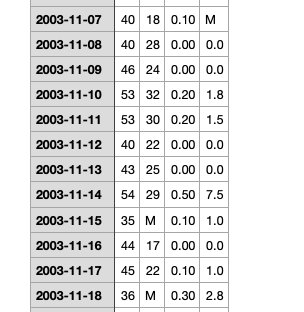

My third step in the data cleaning process was to generate derived variables that would be conducive to the supervised machine learning approach of this project. If I were to train a model to predict snowfall based on temperatures and precipitation for a given day, it would be a near-trivial task and not useful. The purpose of this project is to predict snowfall in the future. To make the data fit into the model forms studied in class, I created derived variables. 

The first derived variable is the date of the year, converted from MONTH/DAY/YEAR to just a single DOY number. I envision this variable being useful in that it will capture which months correspond with higher snowfall during the year. Anecdotally, I have heard that the resorts with higher elevations get their snow sooner. Including this variable could capture that effect, if it is indeed real.

The second derived variable set is the average temperature, precipitation, and snowfall ranges over the past week. This is a rolling calculation for each date.

The third derived variable I created so that I could use a classifier was a Powder Day marker. Using 3 inches as the threshold, it indicates whether a day meets the Powder Day standard or not.

### Exploratory Data Analysis
In my exploratory data analysis, i first imported the cleaned up data in csv format. I then printed the headers and created a correlation matrix. Snow, the last variable column in the pandas dataframe, is the output. It represents inches of snowfall on that given day.

The correlation matrix shows the highest relationship between precipitation and snow over the last week. There is likely collinearity between the precipitation and snow variables since snow is just frozen precipitation. The average daily temperature minimum over the previous week is the next most closely correlated variable.

The correlation coefficient between day of year (DOY) and the daily snow fall was lower than I would have thought. This could be because the correlation coefficient in the Python pandas .corr() function is a linear correlation coefficient. Intuitively, I know that some months are better for snow than others. However, that relationship is non-linear. I created a scatter plot showing the snowfall versus the day of the year. Because there are so many different data points, it was still hard to visualize a pattern.

The next plot I created was a boxplot showing the daily snowfall, but grouped by month. This better illustrated the relationship between time of year and snowfall and justified my ongoing inclusion of the DOY variable in the generation of supervised machine learning models.

array([[<Axes: title={'center': 'DOY'}>,
        <Axes: title={'center': 'Low Temp Average Last Week'}>],
       [<Axes: title={'center': 'High Temp Average Last Week'}>,
        <Axes: title={'center': 'Precipitation Average Last Week'}>],
       [<Axes: title={'center': 'Snow Average Last Week'}>,
        <Axes: title={'center': 'Snow'}>]], dtype=object)

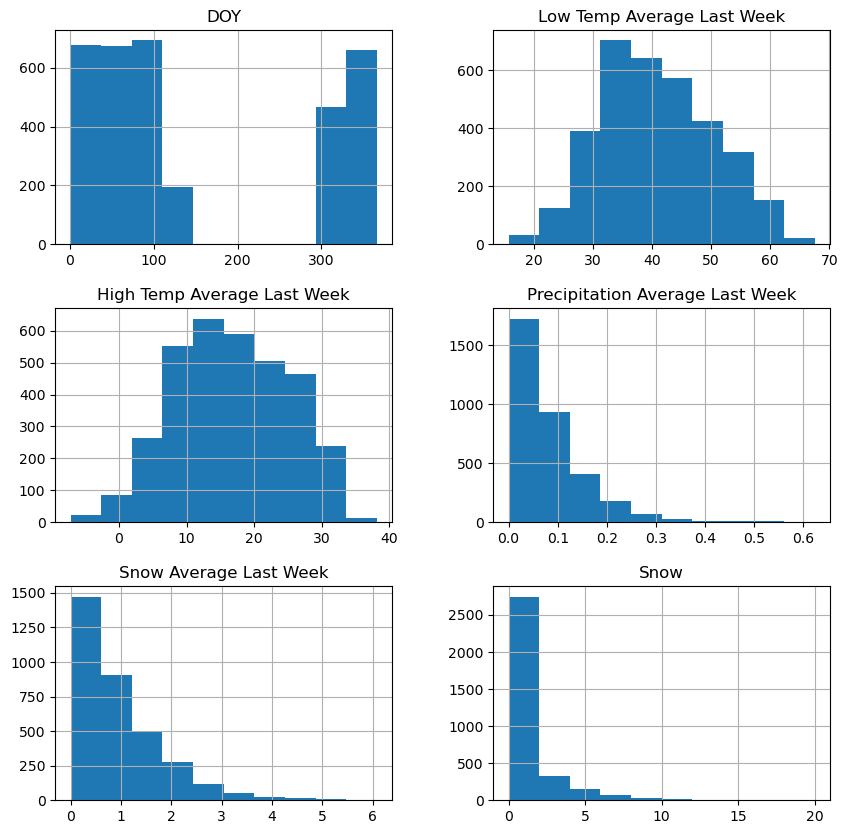

In [25]:
aspen.hist(figsize = (10,10))

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns

aspen = pd.read_csv("Aspen Data Pre Processed 3.csv")
aspen = aspen.dropna()
#display(aspen)

aspen = pd.DataFrame(aspen)
powder_day = []
for i in range(len(aspen)):
    if aspen.loc[i,"Snow"] > 3:
        powder_day.append(1)
    else:
        powder_day.append(0)
aspen['Powder Day'] = powder_day
display(aspen)


jan = aspen.loc[(aspen['DOY'] > 0) & (aspen['DOY'] < 32)]
jan = jan.loc[:,'Snow']#.tolist()

feb = aspen.loc[(aspen['DOY'] > 31) & (aspen['DOY'] < 60)]
feb = feb.loc[:,'Snow']#.tolist()

mar = aspen.loc[(aspen['DOY'] > 59) & (aspen['DOY'] < 91)]
mar = mar.loc[:,'Snow']#.tolist()

apr = aspen.loc[(aspen['DOY'] > 90) & (aspen['DOY'] < 122)]
apr = apr.loc[:,'Snow']#.tolist()

nov = aspen.loc[(aspen['DOY'] > 304) & (aspen['DOY'] < 335)]
nov = nov.loc[:,'Snow']#.tolist()

dec = aspen.loc[(aspen['DOY'] > 334) & (aspen['DOY'] < 367)]
dec = dec.loc[:,'Snow']#.tolist()

months = pd.concat([jan,feb, mar, apr, nov, dec], axis = 1)
months.columns = ['January', 'February', 'March', 'April', 'November', 'December']

,ASPEN 1SW,DOY,Low Temp Average Last Week,High Temp Average Last Week,Precipitation Average Last Week,Snow Average Last Week,Snow,Powder Day
0,11/1/03,305,59.000000,35.000000,0.000000,0.000000,0.0,0
1,11/2/03,306,48.000000,35.000000,0.100000,0.000000,0.0,0
2,11/3/03,307,44.000000,32.000000,0.500000,0.000000,0.0,0
3,11/4/03,308,41.000000,15.000000,0.400000,4.500000,4.5,1
4,11/5/03,309,38.000000,11.000000,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...
3365,4/26/23,116,40.714286,19.142857,0.167143,2.357143,8.5,1
3366,4/27/23,117,38.714286,18.428571,0.297143,3.571429,0.0,0
3367,4/28/23,118,40.714286,21.000000,0.230000,2.542857,1.0,0
3368,4/29/23,119,44.000000,22.857143,0.238571,2.500000,0.0,0


In [109]:
aspen.corr(numeric_only = True)

,DOY,Low Temp Average Last Week,High Temp Average Last Week,Precipitation Average Last Week,Snow Average Last Week,Snow,Powder Day
DOY,1.000000,0.108823,0.134369,-0.013016,-0.039203,-0.008663,-0.013611
Low Temp Average Last Week,0.108823,1.000000,0.917810,-0.232341,-0.398137,-0.048615,-0.019144
High Temp Average Last Week,0.134369,0.917810,1.000000,-0.075990,-0.265009,-0.025786,-0.003198
Precipitation Average Last Week,-0.013016,-0.232341,-0.075990,1.000000,0.907805,0.108996,0.076257
Snow Average Last Week,-0.039203,-0.398137,-0.265009,0.907805,1.000000,0.103254,0.068696
Snow,-0.008663,-0.048615,-0.025786,0.108996,0.103254,1.000000,0.845840
Powder Day,-0.013611,-0.019144,-0.003198,0.076257,0.068696,0.845840,1.000000


<Axes: xlabel='DOY', ylabel='Snow'>

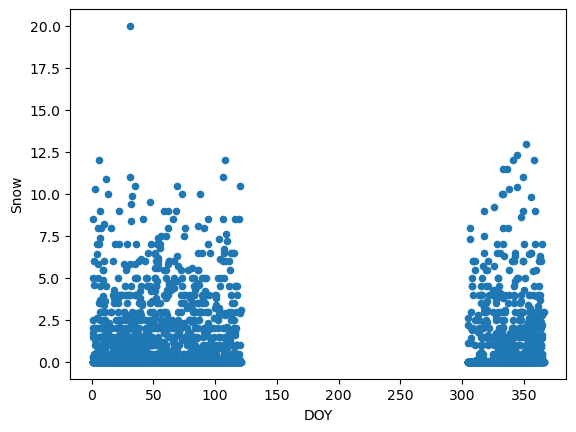

In [230]:
aspen.plot.scatter(x='DOY',y = 'Snow')

<Axes: >

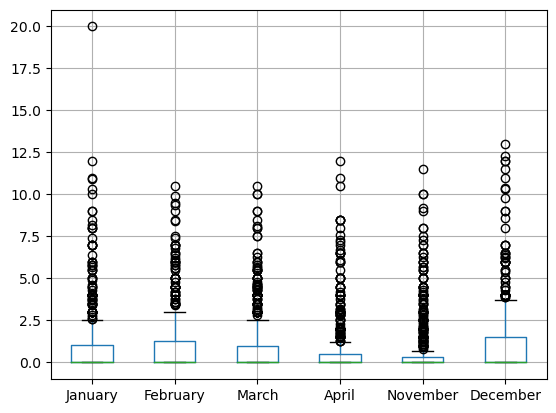

In [231]:
months.boxplot()

### Models
To capture the relationships between the aforementioned predictors and whether the next day will be a powder day, I created two types of supervised machine learning models and compared the results.

My first approach was to create a non-linear support vector machine, generally following the procedure shown in the week 6 homework assignment. To optimize the hyperparameters, I did an automated grid search and picked the C and gamma values that maximized the performance of the rbf kernel. I used three cross validation folds.

My second approach was to create a random forest classifier. I manually modified the maximum depth paramater and found that between 3 and 20, it didn't change the resulting accuracy score.

In [232]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV

In [233]:
X = aspen.iloc[:,1:5]
y = aspen.iloc[:,7]

In [234]:
param_grid = {'C': [2**(0),2**(1),2**(2),2**(3),2**(4), 2**(5)], 
              'gamma': [2**(-5),2**(-4),2**(-3),2**(-2),2**(-1),2**(0),2**(1),2**(2),2**(3)],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid, refit = True, cv=3)
grid.fit(X,y)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 2, 4, 8, 16, 32],
                         'gamma': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4,
                                   8],
                         'kernel': ['rbf']})

In [235]:
#From week 6 programming homework   
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
def plotSearchGrid(grid):
    
    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid["C"]), len(grid.param_grid["gamma"]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.1, midpoint=0.8))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["gamma"])), grid.param_grid["gamma"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["C"])), grid.param_grid["C"])
    plt.title('Validation accuracy')
    plt.show()


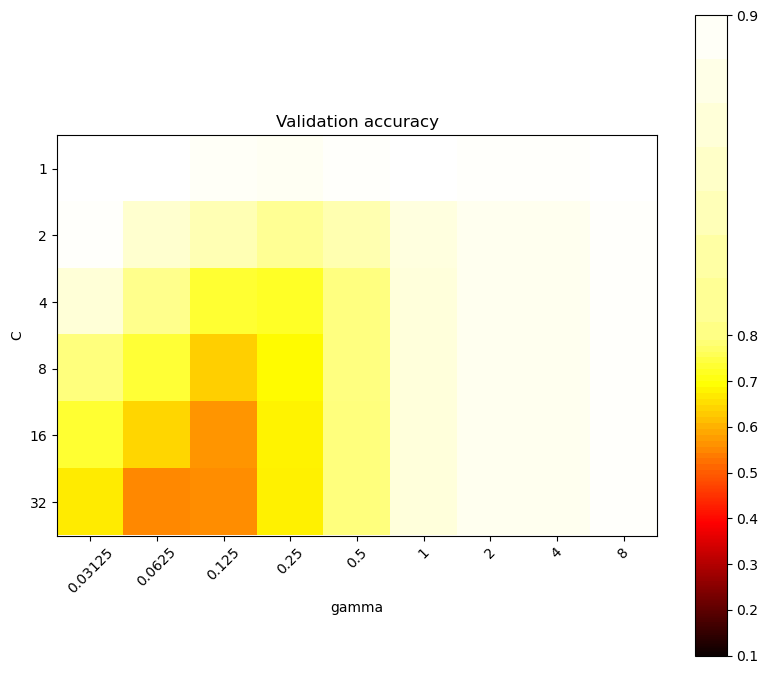

In [236]:
plotSearchGrid(grid)

In [165]:
print(grid.best_params_)

{'C': 1, 'gamma': 8, 'kernel': 'rbf'}


In [228]:
svm_tuned = SVC(kernel = 'rbf', C = 1, gamma = 8)
svm_tuned.fit(X, y)
scores = cross_val_score(svm_tuned,X_train,y_train, cv = 5)
p2 = svm_tuned.predict(X_test)
print(np.mean(scores))

0.8950298907441765


In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

forest = RandomForestClassifier(max_depth = 3)
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8946587537091988


### Results and Analysis

The average cross validated accuracy score of the hyperparameter tuned SVM model was 0.891. The test accuracy of the random forest classifier was 0.894. By that isolated metric, the random forest does perform marginally better. However, that does not consider the performance of the model in the context of the test dataset that is imbalanced towards having far more non-powder days than powder days.

To further compare the two models, I created two confusion matrices. The first confusion matrix shows the predictive performance of the random forest, whereas the second confusion matrix is for the SVM.

It is clear from the first confusion matrix that the random forest has defaulted to just predicting every single day is not a powder day. Since most days are not powder days, that approach automatically yields a misleadingly high accuracy score. The recal statistic, though, is zero. The random forest classifier is therefore not a useful model.

On the other hand, the SVM confusion matrix shows perfect identificaiton of non-powder days and near perfect prediction of powder days (recall = 0.97).

Therefore, the SVM is the final, deliverable model.

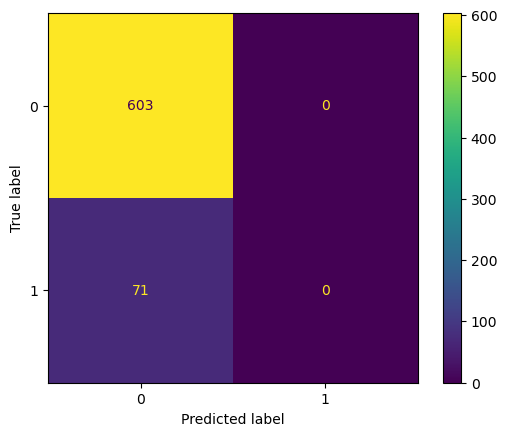

In [227]:
c = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(c).plot()

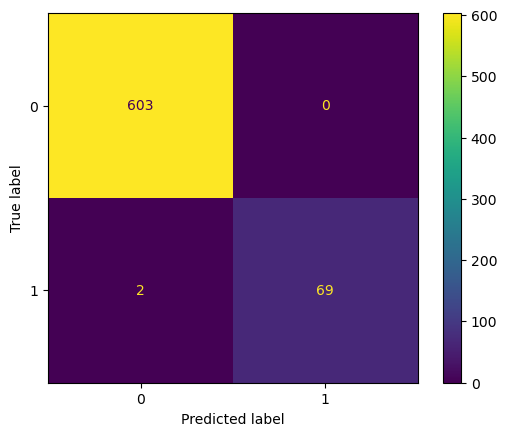

In [229]:
c = confusion_matrix(y_test, p2)
ConfusionMatrixDisplay(c).plot()

### Discussion and Conclusion
In this project, I created multiple models to explore the relationship between time of year, past weather, and predicted future snowfall for the purposes of predicting the ideal powder days to ski. While I could achieve relatively high accuracy scores using both random forest classifier and SVM methods, the contextualized performance of the SVM was much better and is the final model result from this project.

Through this project, I learned how different types of classifier algorithms behave and how a singular performance metric, such as the accuracy score, does not provide a complete picture of a model test.

Upon reflection, the random forest likely didn't work because of how imblanced the dataset was. I achieved satisfactory results using the SVM instead, but if I had to use a random forest, I would duplicate the powder days data points in just the training set to increase the sensitive to powder day events.

In terms of future improvement, the dataset I used was somewhat limited in scope. It considered a rolling average of the last week's worth of weather, but didn't utilize real-time forecast. If I were to keep the project going further, I would try to model the coupling of a standard weather forecast metric wth the historical approach I captured in this project to try to make the model performance even better. I might also try following this same process for multiple mountains to create a recommender that not only predicts whether Aspen will have a powder day, but compares all Colorado ski mountains to recommend which one a skier should go to on a given day.

#### References:
1. https://climate.colostate.edu/data_access_new.html
    - This is the Colorado State University website from which I got the snowfall data I used in this project.
2. https://towardsdatascience.com/estimating-future-snowfall-in-denver-colorado-using-machine-learning-in-python-ada88a531001
    - I read this post someone made about a snowfall prediction model for the Denver area. It just used regular linear regression and didn't consider temporal relationships or historical rolling averages like I did. It's part of how I got the idea to make a ski mountain powder day optimization code, so that's why I'm citing it here.
3. DTSA 5509 Class Lectures and Assignments